### IMPORT

In [ ]:
import pandas as pd # Veri manipülasyonu ve CSV okuma için
import numpy as np # Sayısal işlemler için
from mlxtend.frequent_patterns import apriori # Apriori algoritmasını çalıştırmak için
from mlxtend.frequent_patterns import association_rules # Kuralları ve metrikleri (Lift, Confidence) üretmek için
from mlxtend.preprocessing import TransactionEncoder

# Görselleştirme için 
import matplotlib.pyplot as plt
import seaborn as sns

### VERİ YÜKLEME

In [ ]:

df = pd.read_csv('C:\\Users\\merve\\Desktop\\staj_lotus_ai\\EtSut_ML_Projects\\04_association_market\\data\\groceries - groceries.csv', header=None)

print(df.head())

        0               1                    2             3             4   \
0  Item(s)          Item 1               Item 2        Item 3        Item 4   
1        4    citrus fruit  semi-finished bread     margarine   ready soups   
2        3  tropical fruit               yogurt        coffee           NaN   
3        1      whole milk                  NaN           NaN           NaN   
4        4       pip fruit               yogurt  cream cheese  meat spreads   

       5       6       7       8       9   ...       23       24       25  \
0  Item 5  Item 6  Item 7  Item 8  Item 9  ...  Item 23  Item 24  Item 25   
1     NaN     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   
2     NaN     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   
3     NaN     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   
4     NaN     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   

        26       27       28       29       30       31       

### VERİYİ HAZIRLAMA (boş olmayan ürünleri bulup listeye ekliyoruz )

In [4]:
transactions = []
for i in range(0, len(df)):
    # Her satırdaki ürünleri stringe çevirip, boş olmayanları listeye ekle
    transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns)) if str(df.values[i,j]) != 'nan'])

### NORMALIZATION (0 ile 1 arasında değer vererek matrise çeviriyoruz )

In [ ]:


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Sonuç matrisi
print(df_encoded.head())

       1     10     11     12     13     14     15     16     17     18  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3   True  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

   turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0   False    False    False               False   False        False   
1   False    False    False               False   False        False   
2   False    False    False               False   False        False   
3   False    False    False               False   False        False   
4   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     Fa

In [6]:
# Minimum %1 destek (support) ile sık geçen ürünleri bulalım
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Kaç adet sık geçen öğe kümesi bulduğumuzu görelim
print(f"Bulunan Sık Öğe Kümesi Sayısı: {len(frequent_itemsets)}")
print(frequent_itemsets.head())

Bulunan Sık Öğe Kümesi Sayısı: 411
    support itemsets
0  0.219500      (1)
1  0.025010     (10)
2  0.018503     (11)
3  0.011895     (12)
4  0.167039      (2)


### ASSOICATION RULES

In [7]:
# Kuralları oluşturalım (Metric olarak Lift'i seçiyoruz)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sonuçları Lift değerine göre büyükten küçüğe sıralayalım
rules = rules.sort_values("lift", ascending=False)

# En güçlü 10 kuralın önemli metriklerini ekrana basalım
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                            antecedents                         consequents  \
531                              (curd)                (whole milk, yogurt)   
530                (whole milk, yogurt)                              (curd)   
511    (citrus fruit, other vegetables)                   (root vegetables)   
514                   (root vegetables)    (citrus fruit, other vegetables)   
630          (yogurt, other vegetables)                (whipped/sour cream)   
635                (whipped/sour cream)          (yogurt, other vegetables)   
586                   (root vegetables)  (tropical fruit, other vegetables)   
583  (tropical fruit, other vegetables)                   (root vegetables)   
96                               (beef)                   (root vegetables)   
97                    (root vegetables)                              (beef)   

      support  confidence      lift  
531  0.010065    0.188931  3.372647  
530  0.010065    0.179673  3.372647  
511  0.010370   

### LIFT DEĞERLEİRNE GÖRE SUPPORT VE CONFIDENCE DEĞERLERİ 

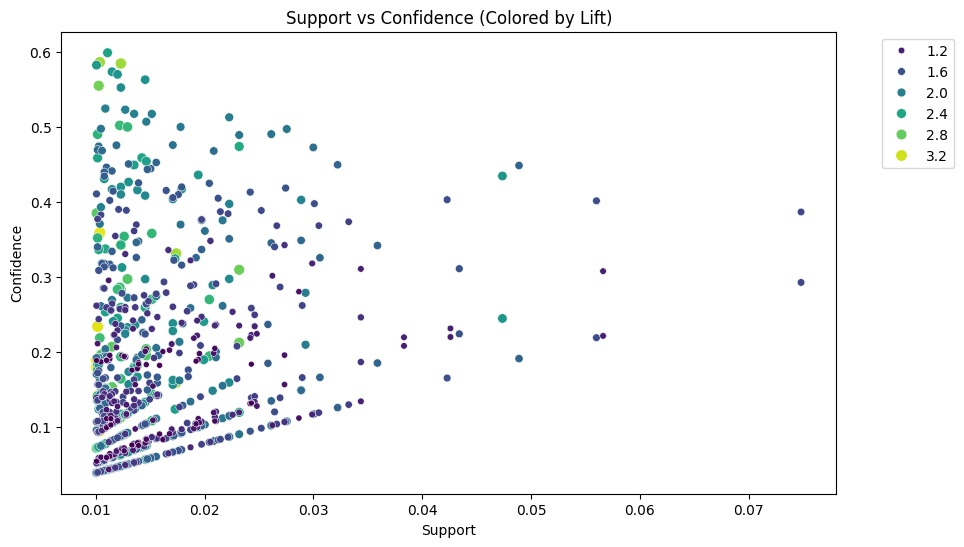

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="viridis")
plt.title("Support vs Confidence (Colored by Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### BİR ÜRÜNÜ ALDIĞIMIZDA DİĞER ÜRÜNÜ ALMA İHTİMALİMİZ NE KADAR KAT ARTIYOR (LIFT) DEĞERLERİ

C:\Users\merve\AppData\Local\Temp\ipykernel_6504\1373861331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lift", y="rule_name", data=top_10_lift, palette="mako")


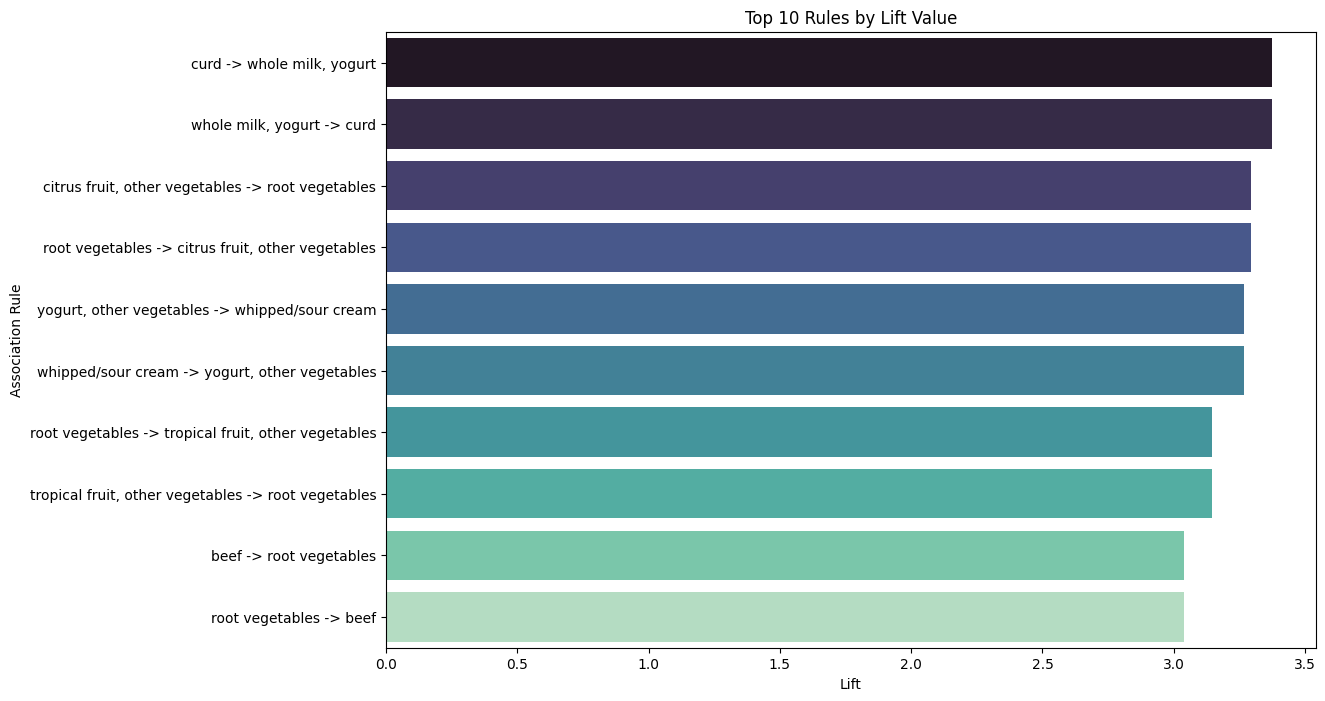

In [9]:
# Kural isimlerini okunabilir yapmak için kısa etiketler oluşturalım
rules['rule_name'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " -> " + \
                     rules['consequents'].apply(lambda x: ', '.join(list(x)))

top_10_lift = rules.nlargest(10, 'lift')

plt.figure(figsize=(12, 8))
sns.barplot(x="lift", y="rule_name", data=top_10_lift, palette="mako")
plt.title("Top 10 Rules by Lift Value")
plt.xlabel("Lift")
plt.ylabel("Association Rule")
plt.show()

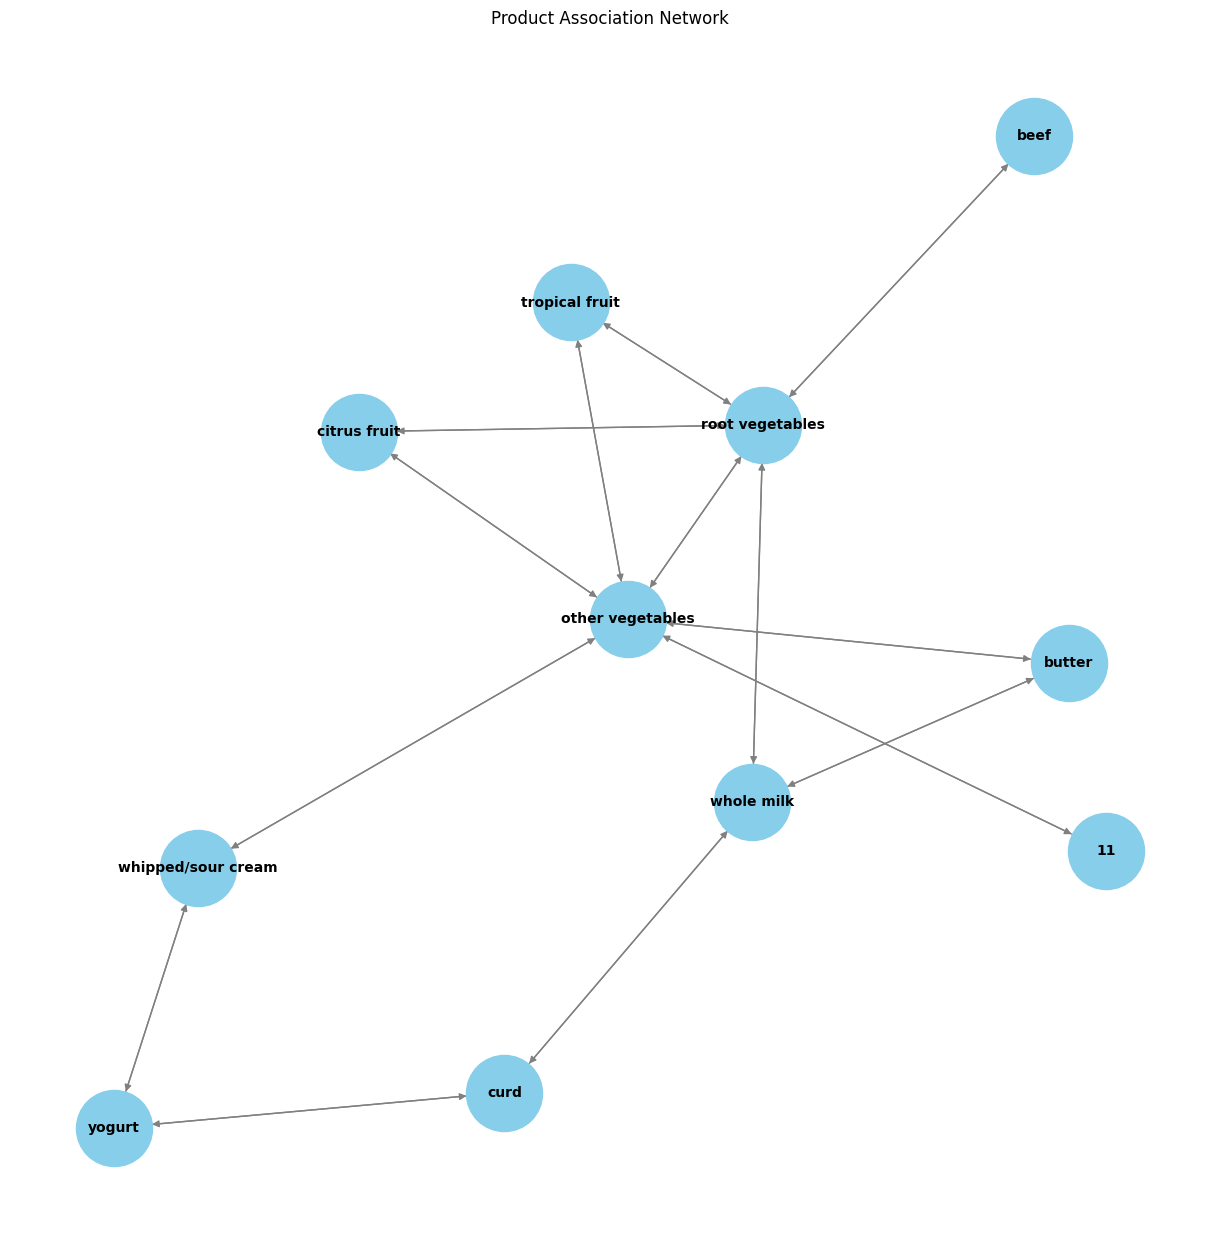

In [12]:
import networkx as nx

# Sadece en yüksek Lift'li 20 kuralı görselleştirelim (karışıklığı önlemek için)
sub_rules = rules.head(20)
G = nx.DiGraph()

for i, row in sub_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, 
        edge_color='gray', font_size=10, font_weight='bold', arrows=True)
plt.title("Product Association Network")
plt.show()